# Import Libraries

In [ ]:
import hta
from hta.trace import Trace
from hta.trace_analysis import TraceAnalysis
from pathlib import Path

## Display figures on github

+ The following cell enables the figures visible on github but causes the figure being  non-interactive.

+ To enable interactive viewing of the figures, set `ON_GITHUB = False` when running this notebook outside github.

In [2]:
ON_GITHUB = True
# ON_GITHUB = False
if ON_GITHUB:
    import plotly.io as pio
    pio.renderers.default = "svg"

# Get Potential Stragglers Using Trace Analysis

## Create a Trace Analysis object

In [ ]:
%%time
from hta.trace_analysis import TraceAnalysis

trace_path = str(Path.home().joinpath("TraceAnalyzer").joinpath("hta/tests/data/vision_transformer"))
analyzer = TraceAnalysis(trace_dir = trace_path)

## Look up the documentation of TraceAnalysis.get_potential_stragglers() method

In [4]:
analyzer.get_potential_stragglers?

Signature:
analyzer.get_potential_stragglers(
    profiler_steps: Optional[List[int]] = None,
    num_candidates: int = 2,
    visualize: bool = False,
    straggler_identification_impl: Callable[..., pandas.core.series.Series] = <function find_stragglers_with_late_start_comm_kernels at 0x1694896c0>,
) -> List[int]
Docstring:
Identify potential stragglers based on a pre-defined metric computed from the trace.

Args:
    profiler_steps (List[int]) : a list of profiler steps used in the straggler analysis. If None, then use all iterations.
    num_candidates (int): how many straggler candidates should the straggler analysis look for?
    visualize: should the analysis visualize certain intermediate results?
    straggler_identification_impl: a function or method which implements a straggler identification algorithm. The function
        takes a DataFrame, a TraceSymbolTable, num_candidates, and visualize as input and returns a Series with rank
        as the index and the value as an ind

## Get available profiler steps

In [5]:
analyzer.get_profiler_steps()

[15, 16, 17, 18]

## Get One Potential Straggler Using Iteration 18

2022-09-16 12:00:33,781 - hta - timeline.py:L150 - DEBUG - Preprocessed events data for timeline visualization in 0.00 seconds


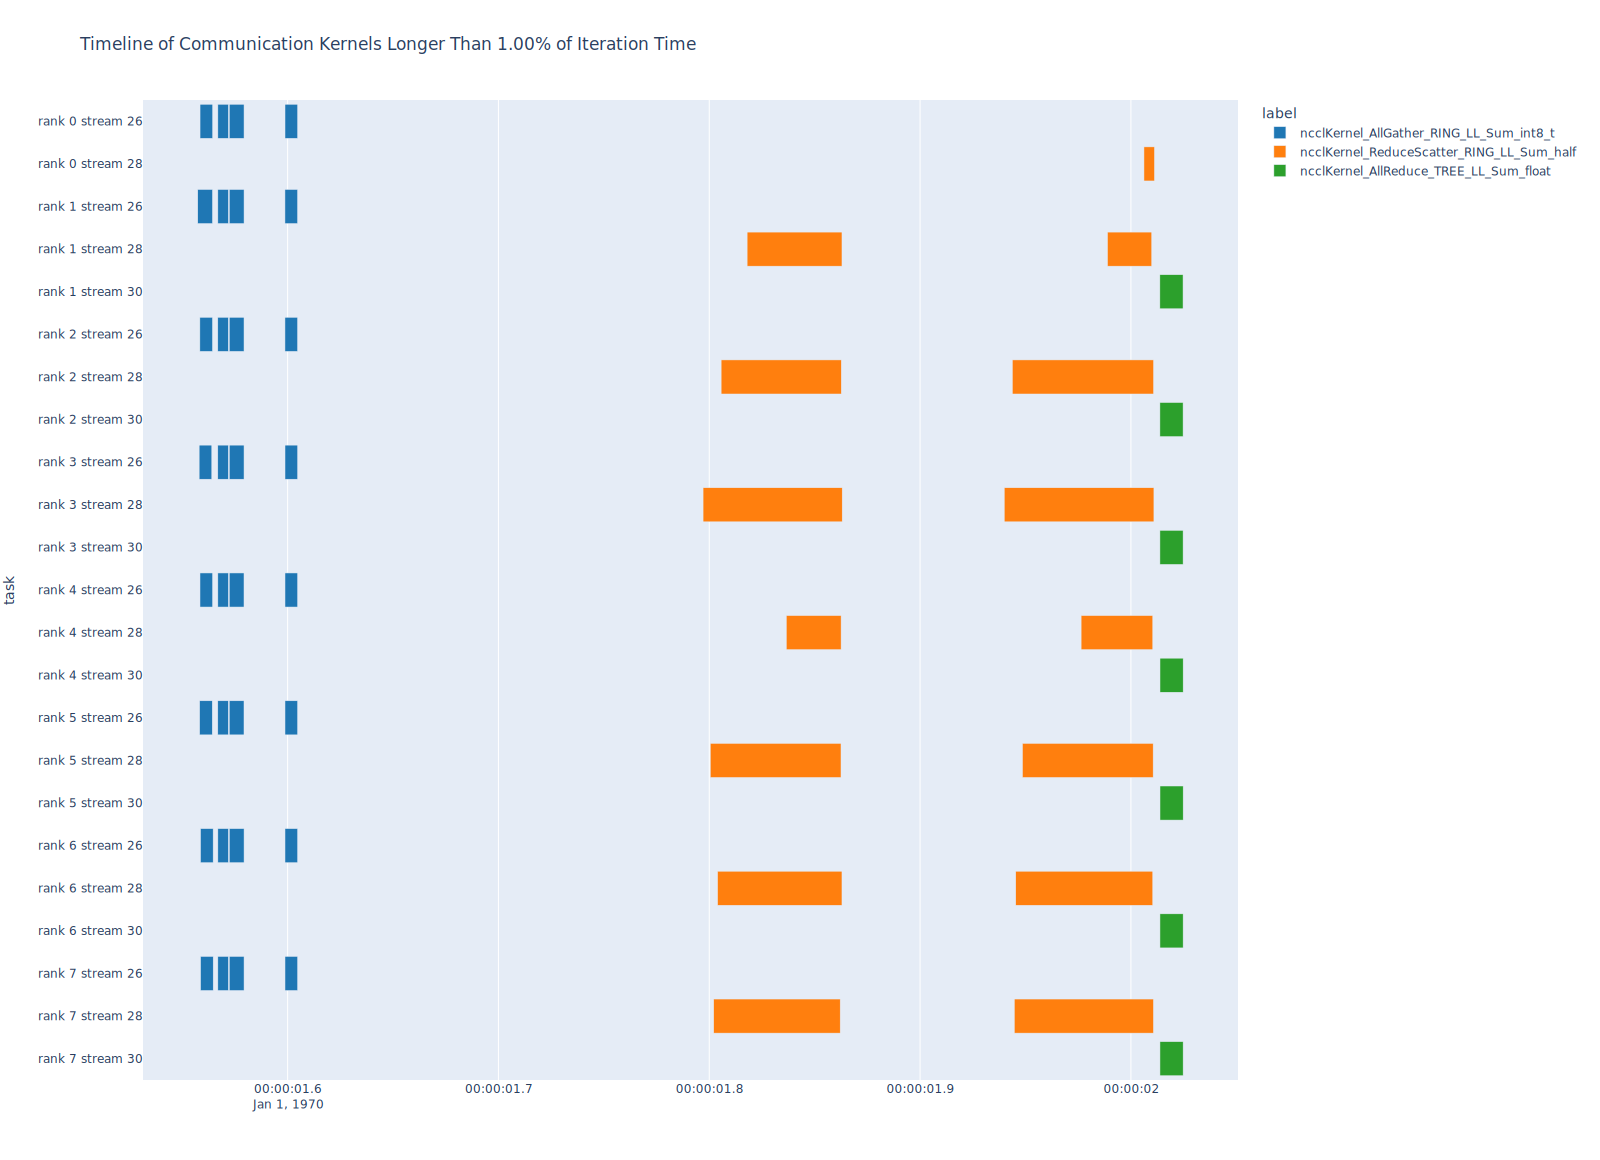

2022-09-16 12:00:34,743 - hta - timeline.py:L65 - DEBUG - Plotted timeline in 0.96 seconds
2022-09-16 12:00:34,751 - hta - timeline.py:L150 - DEBUG - Preprocessed events data for timeline visualization in 0.00 seconds


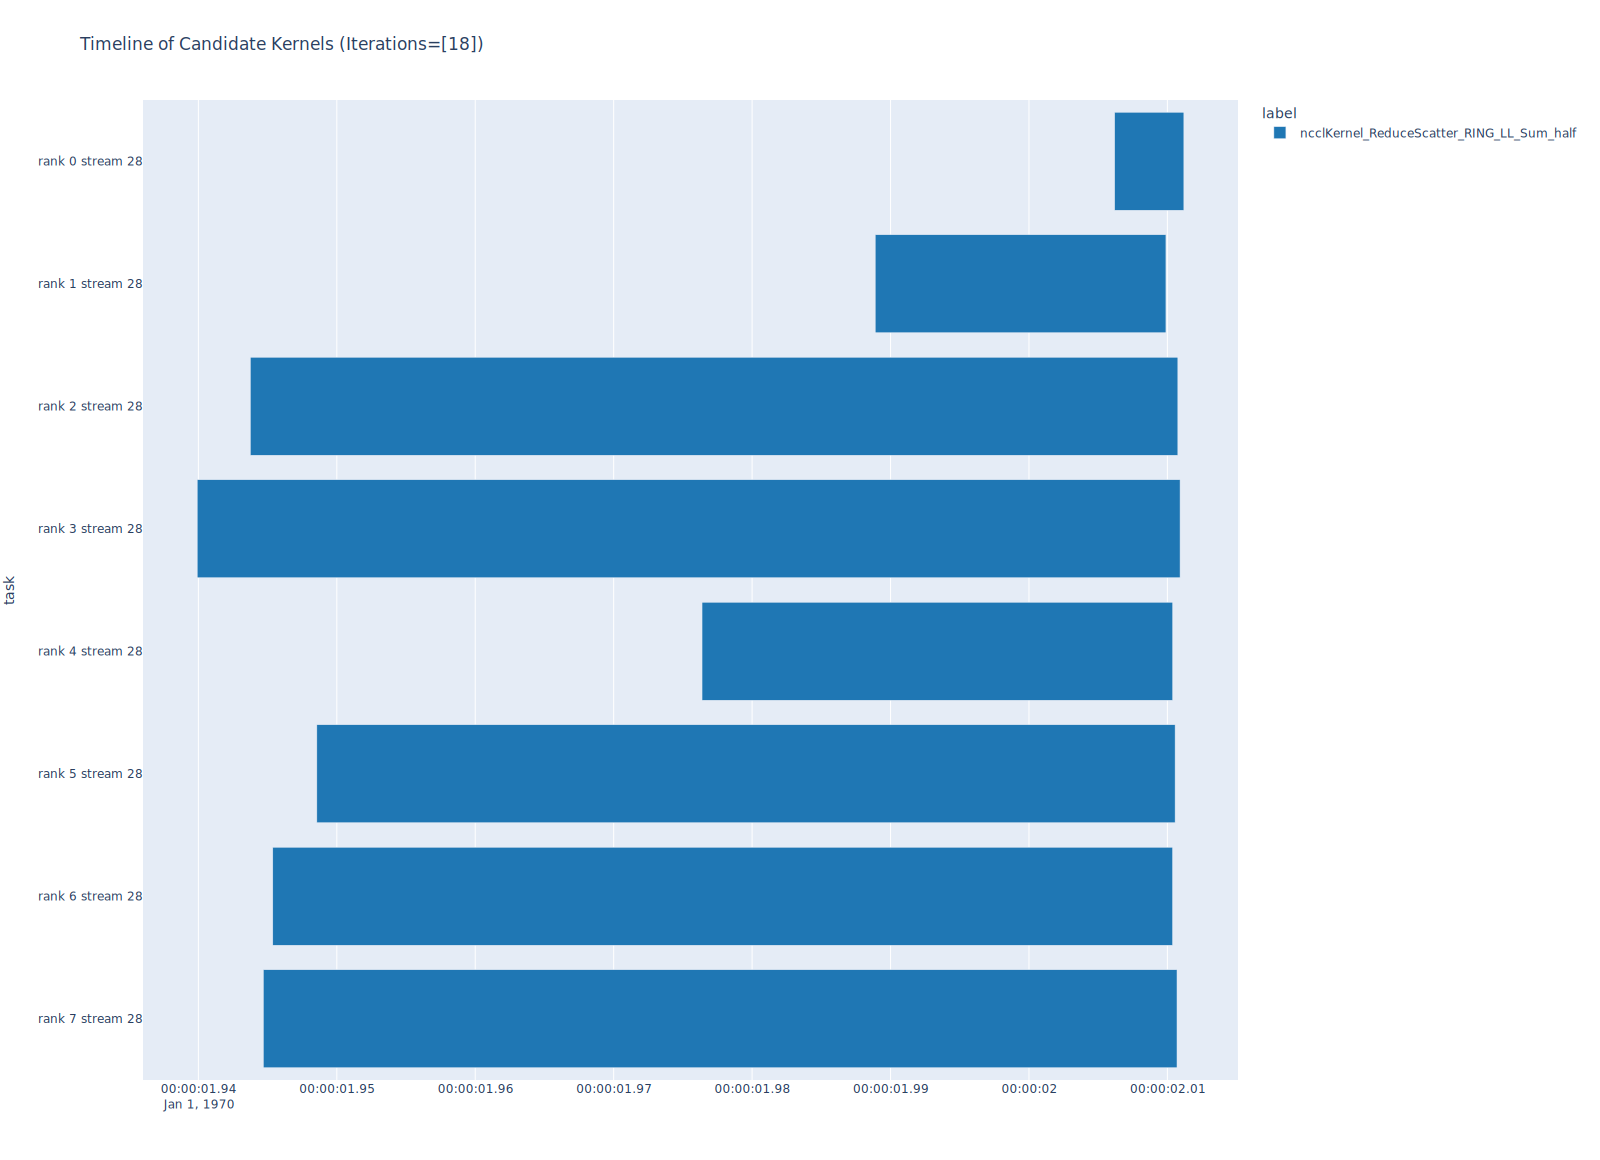

2022-09-16 12:00:34,796 - hta - timeline.py:L65 - DEBUG - Plotted timeline in 0.05 seconds


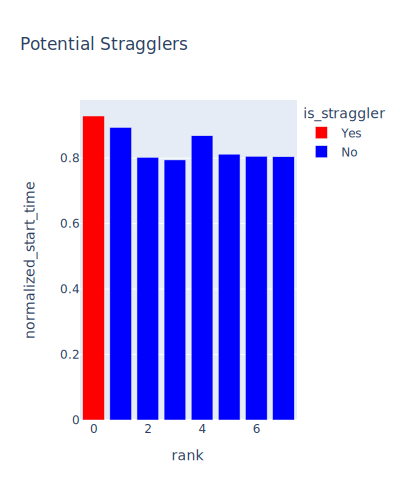

2022-09-16 12:00:34,835 - hta - trace_analysis.py:L687 - DEBUG - found rank [0] is a potential straggler.
CPU times: user 217 ms, sys: 109 ms, total: 326 ms
Wall time: 1.2 s


[0]

In [6]:
%%time
analyzer.get_potential_stragglers(profiler_steps=[18], num_candidates=1, visualize=True)

## Get Potential Stragglers Using All Iterations

In [7]:
# Without Visualization

analyzer.get_potential_stragglers()

2022-09-16 12:00:35,103 - hta - trace_analysis.py:L685 - DEBUG - found ranks [0, 1] are potential stragglers.


[0, 1]

In [8]:
# With Visualization

2022-09-16 12:00:35,310 - hta - timeline.py:L150 - DEBUG - Preprocessed events data for timeline visualization in 0.00 seconds


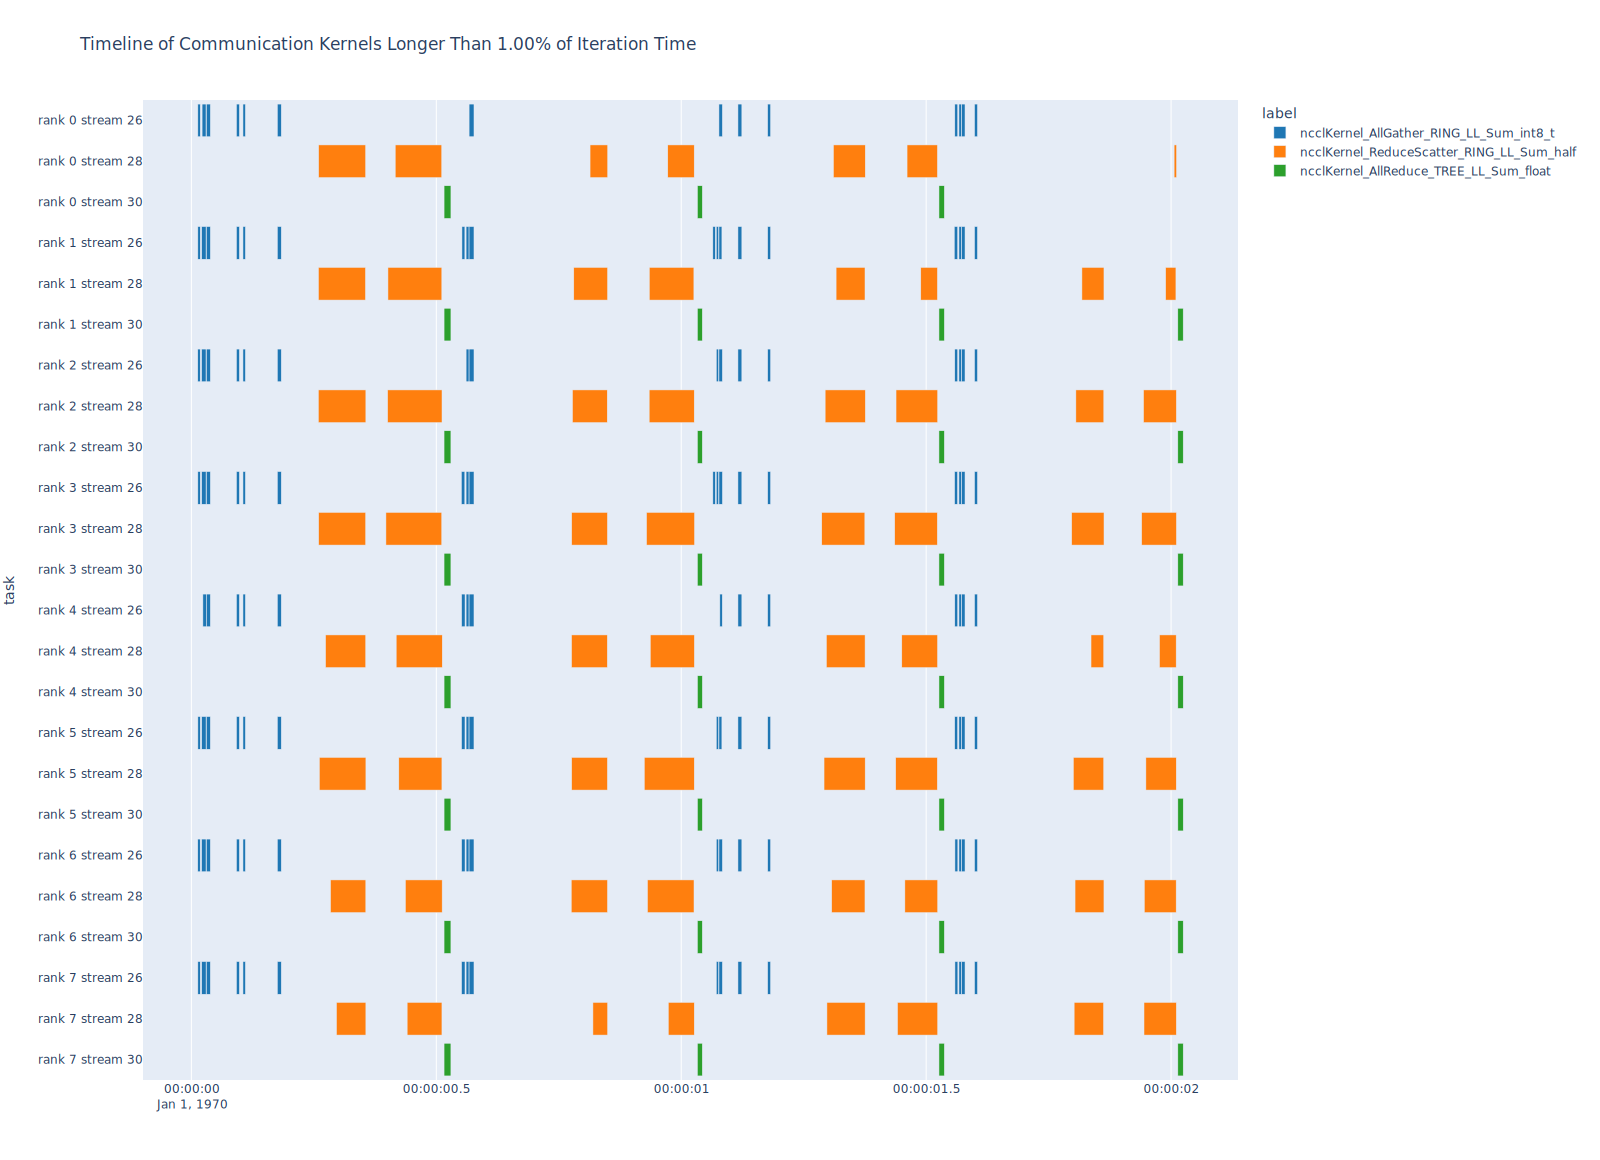

2022-09-16 12:00:35,380 - hta - timeline.py:L65 - DEBUG - Plotted timeline in 0.07 seconds
2022-09-16 12:00:35,387 - hta - timeline.py:L150 - DEBUG - Preprocessed events data for timeline visualization in 0.00 seconds


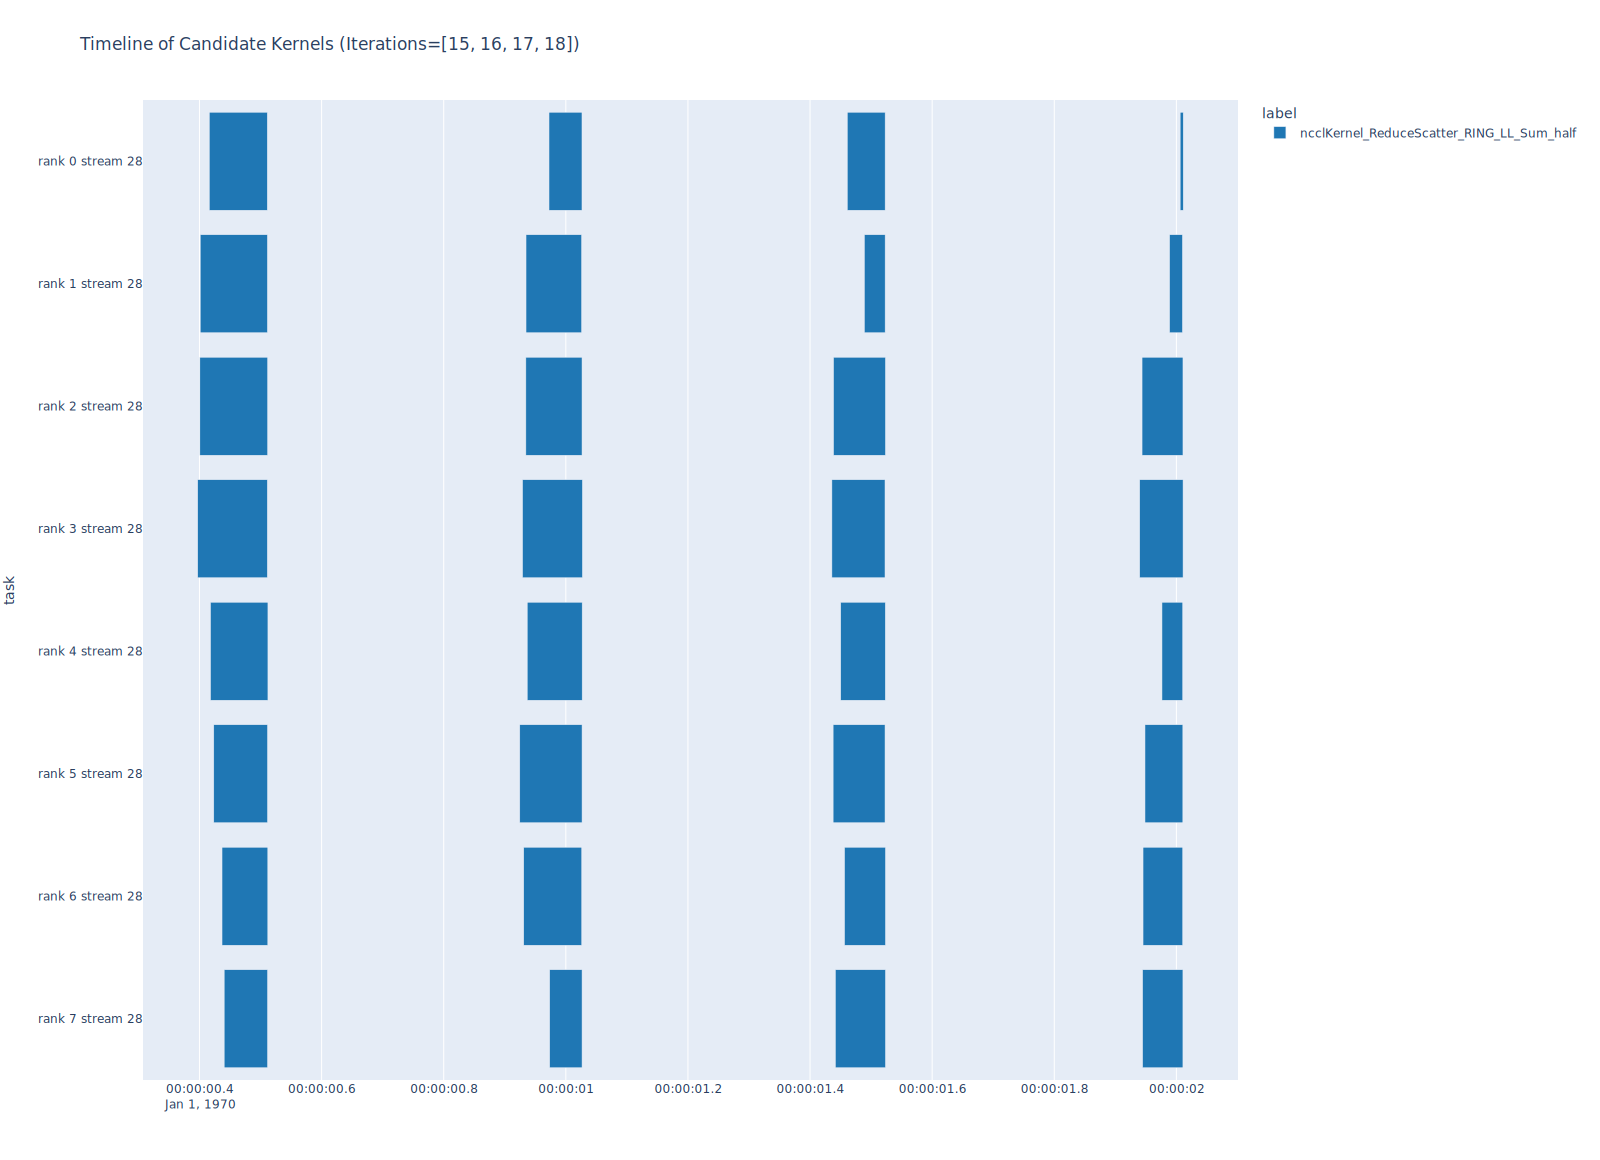

2022-09-16 12:00:35,427 - hta - timeline.py:L65 - DEBUG - Plotted timeline in 0.04 seconds


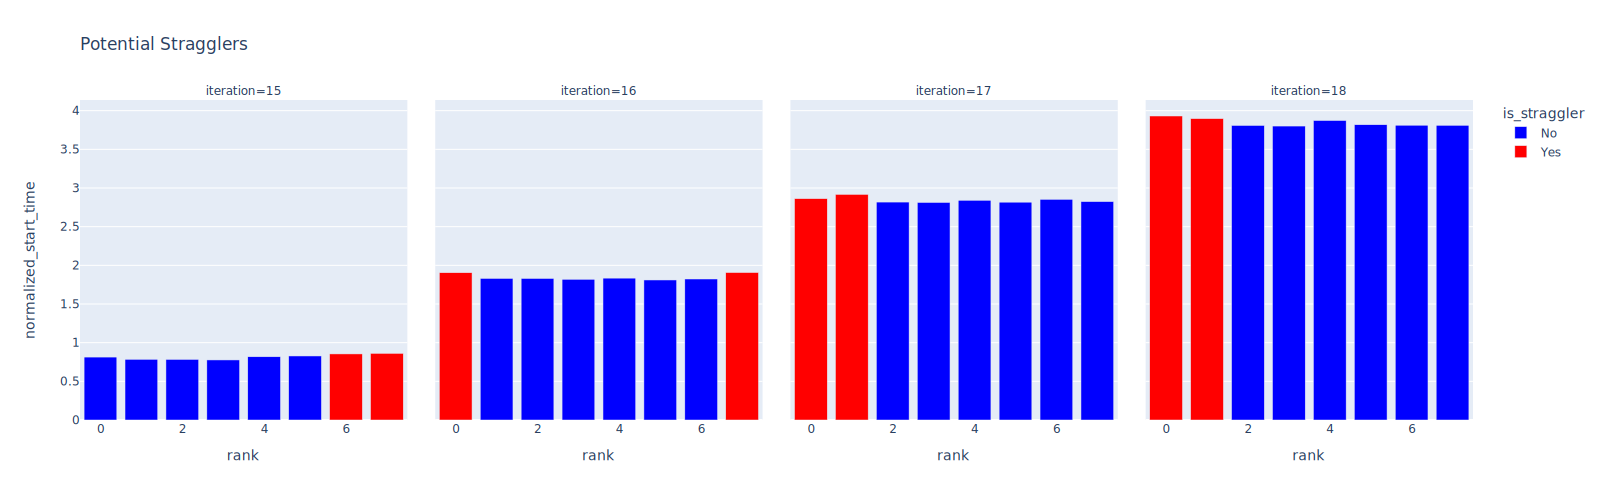

2022-09-16 12:00:35,518 - hta - trace_analysis.py:L685 - DEBUG - found ranks [0, 1] are potential stragglers.


[0, 1]

In [9]:
analyzer.get_potential_stragglers(visualize=True)